<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Javier Alejandro Contreras Figueroa, Ricardo Damián Hernández Ramírez

**Fecha:** 07 de marzo del 2024.

**Expediente** : XXX,740356
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea 4: Clase 11

## Enunciado de tarea 
Las muestras contienen 12 atributos de casas en diferentes lugares alrededor del suburbios de Boston a fines de la década de 1970. Los objetivos son los valores medios de las casas en un lugar (en k$).

Los atributos mismos se definen en el [Sitio web de StatLib](http://lib.stat.cmu.edu/datasets/boston).
El diccionario de datos es el siguiente:

        CRIM: Per capita crime rate by town
        ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
        INDUS: Proportion of non-retail business acres per town
        CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        NOX: Nitric oxide concentration (parts per 10 million)
        RM: Average number of rooms per dwelling
        AGE: Proportion of owner-occupied units built prior to 1940
        DIS: Weighted distances to five Boston employment centers
        RAD: Index of accessibility to radial highways
        TAX: Full-value property tax rate per $10,000
    PTRATIO: Pupil-teacher ratio by town
    LSTAT: Percentage of lower status of the population
    MEDV: Median value of owner-occupied homes in $1000s
    
El objetivo para es este dataset es el siguiente:
1. Construir una red neuronal MLP univariada. Para esto, escoger la variable que más tenga correlación con la variable de salida.
2. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.
3. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

**Nota**: Para poder saber cuales variables incluir en el modelo y cuales rechazar una opción es analizar la correlación de pearson y la otra usando pruebas estadísiticas con las siguientes paqueterías
```
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
```
> Luego del paso 3, crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.


## Ejercicio 1: Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.

## Solución estudiante 1

## Solución estudiante 2

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()


In [2]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7


In [3]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [4]:
# Poner una semilla para replicar resultados
tf.random.set_seed(123)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=50, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 32.6479 - mae: 3.4821
Error cuadrático medio en el conjunto de prueba: 32.64786148071289
Error absoluto medio en el conjunto de prueba: 3.482081890106201


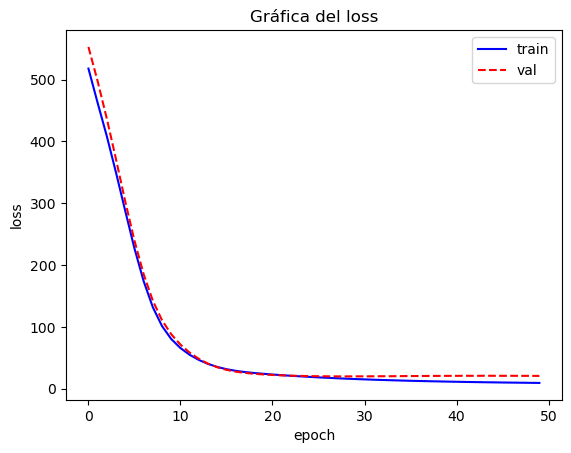

In [6]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.title("Gráfica del loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

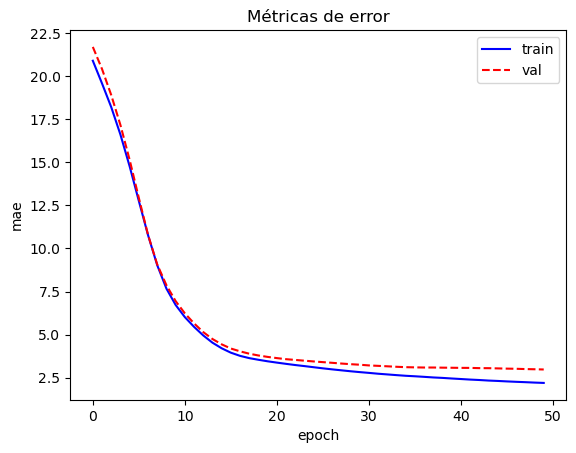

In [7]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.title("Métricas de error")
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

### Ejercicio 2:Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

Código de solución estudiante 1

## Código de solución estudiante 2

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [9]:
# Instancia de SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)  # Las 5 mejores características

# Aplicar a los datos
X_selected = selector.fit_transform(train_data, train_labels)

# Obtener los índices de las features seleccionadas
selected_indices = selector.get_support(indices=True)
# Obtener los nombres de las features seleccionadas
selected_features = data.columns[selected_indices]

print("Variables seleccionadas:", selected_features)

Variables seleccionadas: Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


In [10]:
train_data_selected = selector.transform(train_data)
test_data_selected = selector.transform(test_data)

In [11]:
tf.random.set_seed(123)

model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data_selected.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compilar el modelo
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model2_fit = model2.fit(
    train_data_selected, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=100, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model2.evaluate(test_data_selected, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 23.2533 - mae: 3.3300
Error cuadrático medio en el conjunto de prueba: 23.25330352783203
Error absoluto medio en el conjunto de prueba: 3.330033540725708


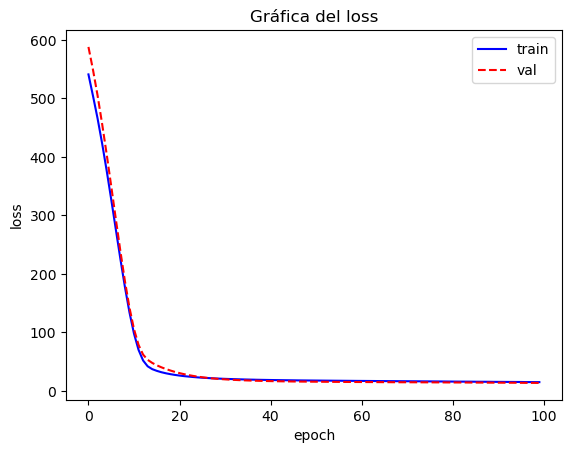

In [13]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model2_fit.history['loss'], 'b', label='train')
plt.plot(model2_fit.history['val_loss'], 'r--', label='val')
plt.title("Gráfica del loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

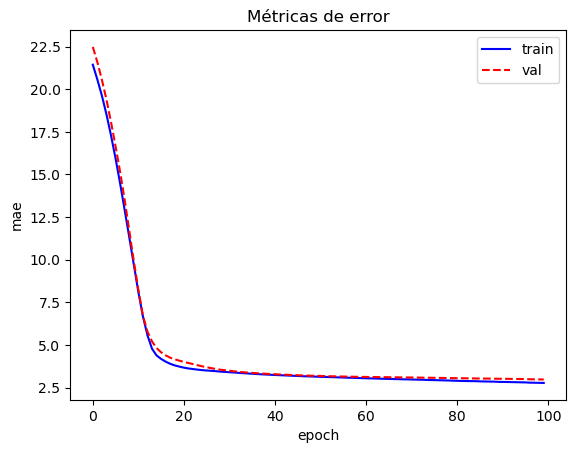

In [14]:
# Graficar métricas de error
plt.plot(model2_fit.history['mae'], 'b', label='train')
plt.plot(model2_fit.history['val_mae'], 'r--', label='val')
plt.title("Métricas de error")
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

### Ejercicio 3: Crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.

Código de solución estudiante 1

## Código de solución estudiante 2

In [15]:
# Establecer la semilla aleatoria para reproducibilidad
tf.random.set_seed(123)

# Callback para la regularización EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Definir la arquitectura de la red neuronal con dropout
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data_selected.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

# Compilar el modelo
model3.compile(optimizer='adam', loss='mse')

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compilar el modelo
model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
model3_fit = model3.fit(
    train_data_selected, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=600, 
    batch_size=32, 
    verbose=0,
    callbacks = [early_stopping]
)
# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model3.evaluate(test_data_selected, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 22.7461 - mae: 3.2935
Error cuadrático medio en el conjunto de prueba: 22.746124267578125
Error absoluto medio en el conjunto de prueba: 3.293548822402954


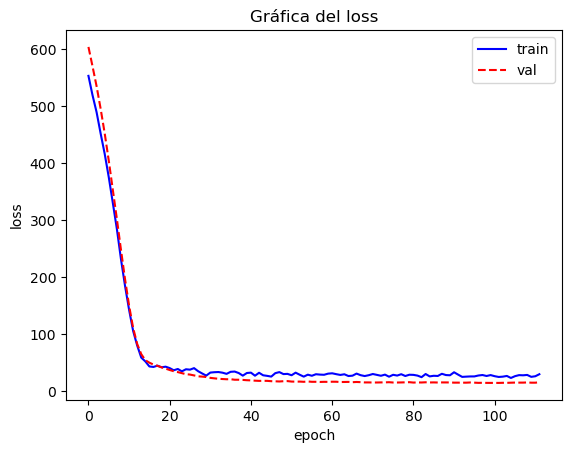

In [17]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model3_fit.history['loss'], 'b', label='train')
plt.plot(model3_fit.history['val_loss'], 'r--', label='val')
plt.title("Gráfica del loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

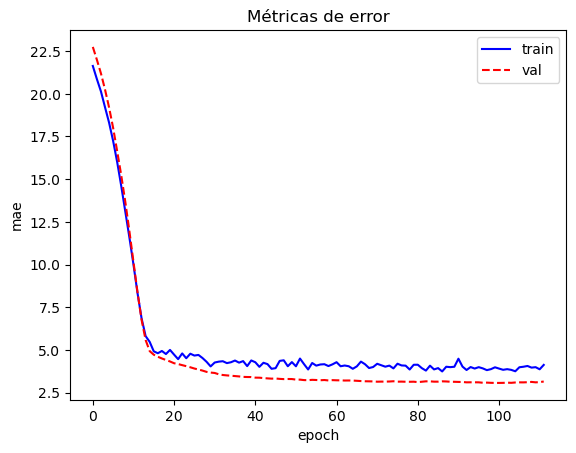

In [18]:
# Graficar métricas de error
plt.plot(model3_fit.history['mae'], 'b', label='train')
plt.plot(model3_fit.history['val_mae'], 'r--', label='val')
plt.title("Métricas de error")
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()